In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/WorldCupMatches.csv")
fifa_point = pd.read_csv("C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/fifa_ranking-2023-07-20.csv")

Chỉnh lại path ở df và fifapoint để chạy nhé

In [6]:
# Filter the DataFrame to keep only the row with the date '7/20/2023'
new_fifa_point = fifa_point[fifa_point['rank_date'] == '7/20/2023']

# Drop the unused columns
new_fifa_point = new_fifa_point.drop(["rank", "country_abrv", "previous_points", "confederation", "rank_change","rank_date"], axis=1)

# Write the filtered DataFrame to a new CSV file
new_fifa_point.to_csv('C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/newfifapoint.csv', index=False)

In [7]:
# Get the total goals scored and conceded by each country
goals_scored = df.groupby('Home Team Name')['Home Team Goals'].sum().to_frame('Goals Scored')
goals_conceded = df.groupby('Away Team Name')['Away Team Goals'].sum().to_frame('Goals Conceded')

# Combine the two DataFrames
country_stats = goals_scored.merge(goals_conceded, left_index=True, right_index=True, how='outer').fillna(0)
country_stats.to_csv('C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/analytics.csv', index=True)

sau khi chạy hai block trên thì mày copy path của hai file mới tạo paste vào fifa_points và analytics ở dưới nhé

In [22]:
# Load the data from the CSV files
fifa_points = pd.read_csv("C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/newfifapoint.csv")
analytics = pd.read_csv('C:/Users/Lam/OneDrive/Máy tính/Data Stuffs/Machine-Learning-1-USTH/CSV files/analytics.csv')

# Merge the two dataframes based on the 'country_full' column
merged_df = pd.merge(fifa_points, analytics, left_on='country_full', right_on='Home Team Name', how='inner')

# Drop any rows where the 'Home Team Name' column is empty (indicating the country was not found in the analytics file)
merged_df = merged_df.dropna(subset=['Home Team Name'])

# Rename the columns
merged_df = merged_df.rename(columns={'country_full': 'Country', 'total_points': 'Total Points', 'Goals Scored': 'Goals Scored', 'Goals Conceded': 'Goals Conceded'})

# Select the desired columns
merged_df = merged_df[['Country', 'Total Points', 'Goals Scored', 'Goals Conceded']]

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

print(merged_df)

                   Country  Total Points  Goals Scored  Goals Conceded
0                     Togo       1140.88             0               1
1      Trinidad and Tobago       1199.74             0               0
2                Korea DPR       1169.96             0               1
3                   Angola       1169.07             0               1
4                  IR Iran       1556.59             0               1
5                   Sweden       1547.11             7               1
6                  Ukraine       1541.25             1               4
7                   Serbia       1539.03             0               2
8                   Poland       1536.99             3               2
9                Australia       1530.45             7               4
10          Korea Republic       1529.30            13               7
11                   Japan       1595.96             6               7
12                 Tunisia       1516.66             3               1
13    

In [43]:
# Get the top 5 countries that scored the most goals
top_scorers = country_stats.sort_values('Goals Scored', ascending=False).head(5)
print("Top 5 Countries by Goals Scored:")
print(top_scorers)
test = list(top_scorers.index)
game = merged_df[(merged_df["Country"] == test[0])|(merged_df["Country"] == test[1])|(merged_df["Country"] == test[2])|(merged_df["Country"] == test[3])|(merged_df["Country"] == test[4])]

Top 5 Countries by Goals Scored:
                Goals Scored  Goals Conceded
Home Team Name                              
Germany                   43              30
Brazil                    34              18
Argentina                 26               7
Spain                     19              12
Portugal                  18               6


In [20]:
# Get the top 5 countries that scored the least goals
bottom_scorers = country_stats.sort_values('Goals Scored').head(5)
print("\nTop 5 Countries by Least Goals Scored:")
print(bottom_scorers)


Top 5 Countries by Least Goals Scored:
                Goals Scored  Goals Conceded
Home Team Name                              
Korea DPR                  0               1
IR Iran                    0               1
Czech Republic             0               3
Serbia                     0               2
China PR                   0               0


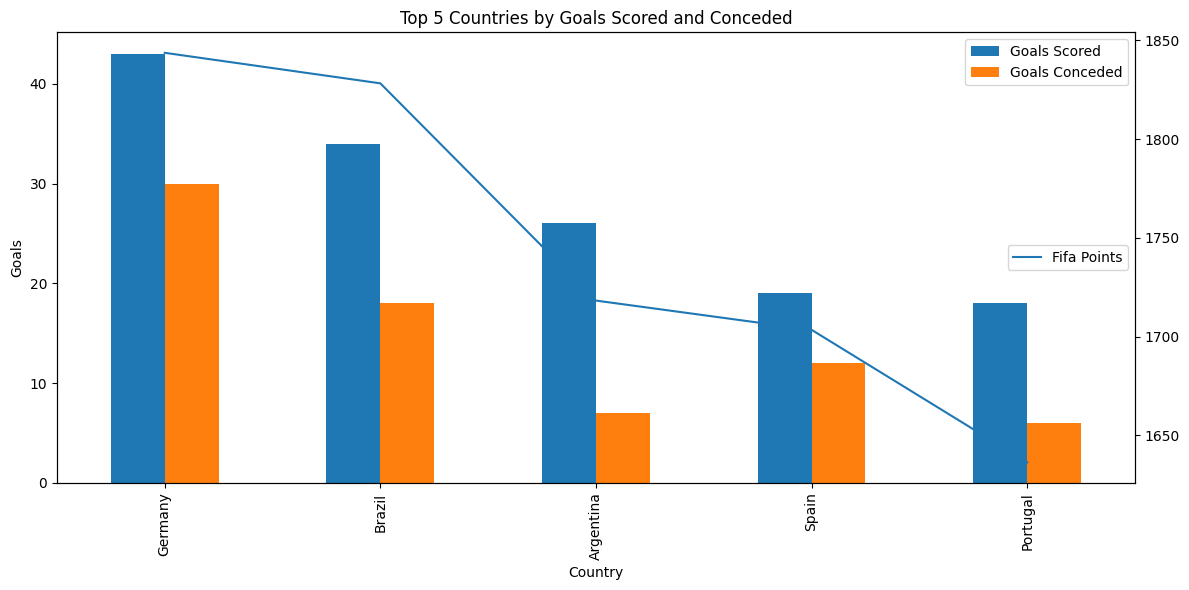

In [51]:
# Create a double bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the goals scored and conceded
top_scorers.plot(kind='bar', ax=ax)
ax.set_title('Top 5 Countries by Goals Scored and Conceded')
ax.set_xlabel('Country')
ax.set_ylabel('Goals')

ax2 = ax.twinx()
ax2.plot(game["Country"],game["Total Points"],label = "Fifa Points")
ax.legend()
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()

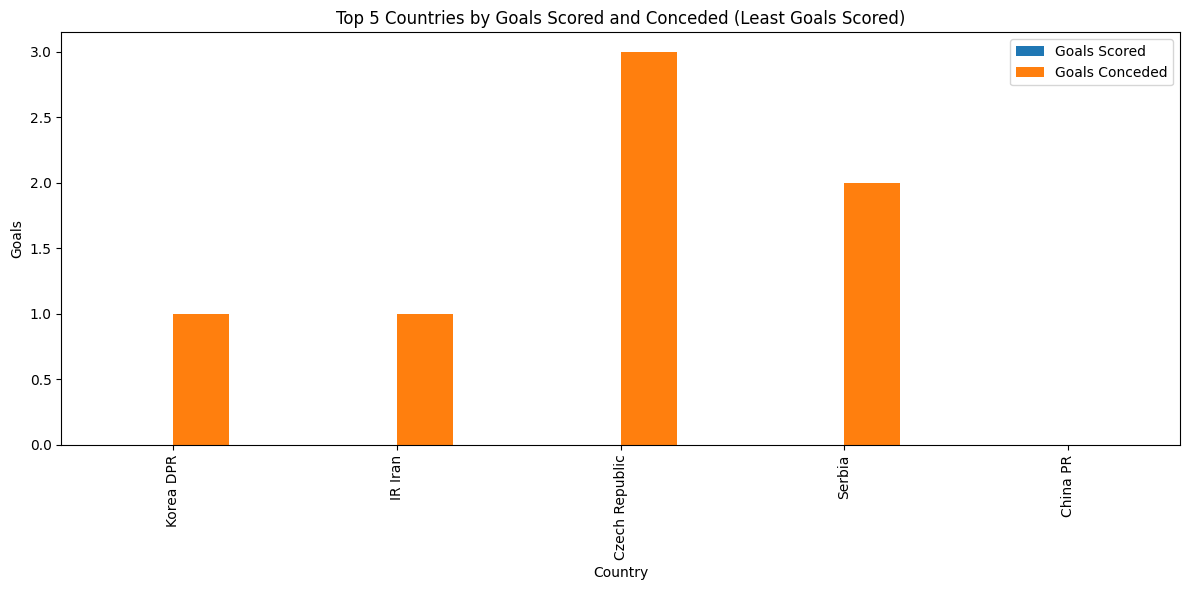

In [12]:
# Create a double bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the goals scored and conceded
bottom_scorers.plot(kind='bar', ax=ax)
ax.set_title('Top 5 Countries by Goals Scored and Conceded (Least Goals Scored)')
ax.set_xlabel('Country')
ax.set_ylabel('Goals')
ax.legend()

plt.tight_layout()
plt.show()
